<a href="https://colab.research.google.com/github/nogood1014/2020-2-AI/blob/main/code/09W_01_tf2_ch04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

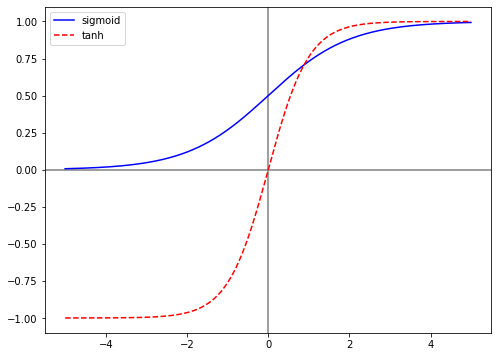

In [ ]:
# 그림 4.2 출력 코드

import math
def sigmoid(x) : 
    return 1 / (1 + math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]

plt.figure(figsize=(8, 6))

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.legend()
plt.show()

In [ ]:
# 4.7 딥러닝 네트워크를 이용한 회귀

import tensorflow as tf
import numpy as np

# 인구증가율과 고령인구비율
X = [0.3, 0.78, 1.26, 0.03, 1.11, 0.24, 0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.83, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=6, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 4.8 딥러닝 네트워크의 학습
model.fit(X, Y, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 1ms/step - loss: 9.3669
Epoch 2/10
1/1 [==============================] - 0s 996us/step - loss: 9.3340
Epoch 3/10
1/1 [==============================] - 0s 1ms/step - loss: 9.2972
Epoch 4/10
1/1 [==============================] - 0s 2ms/step - loss: 9.2567
Epoch 5/10
1/1 [==============================] - 0s 1ms/step - loss: 9.2123
Epoch 6/10
1/1 [==============================] - 0s 1ms/step - loss: 9.1644
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 9.1138
Epoch 8/10
1/1 [==============================] - 0s 1ms/step - loss: 9.0614
Epoch 9/10
1/1 [==============================] - 0s 1ms/step - loss: 9.0083
Epoch 10/10
1/1 [==============================] - 0s 977us/step - loss: 8.9553


In [ ]:
# 4.9 딥러닝 네트워크의 Y값 예측
model.predict(X)

array([[16.2184  ],
       [15.998303],
       [15.681905],
       [16.237036],
       [15.788992],
       [16.232372],
       [16.232372],
       [15.731767],
       [14.795802],
       [15.918132],
       [14.439468],
       [15.850084],
       [16.05417 ],
       [16.235107],
       [14.837127],
       [13.905417]], dtype=float32)

In [ ]:
# 4.10 딥러닝 네트워크의 회귀선 확인
import matplotlib.pyplot as plt

line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x, line_y, 'r--')
plt.plot(X,Y,'bo')

plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly population Rate (%)')
plt.show()

NameError: ignored

In [ ]:
# 4.4 텐서플로를 이용해서 회귀선 구하기
import tensorflow as tf
import numpy as np

# 인구증가율과 고령인구비율
X = [0.3, 0.78, 1.26, 0.03, 1.11, 0.24, 0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.83, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a와 b를 랜덤한 값으로 초기화합니다. 
# a = tf.Variable(random.random())
# b = tf.Variable(random.random())
a = tf.Variable(tf.random.uniform([1], 0, 1))
b = tf.Variable(tf.random.uniform([1], 0, 1))

# 잔차의 제곱의 평균을 반환하는 함수입니다.
def comput_loss() :
    y_pred = a* X + b
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

optimizer = tf.keras.optimizers.Adam(lr=0.07)
for i in range(1000):
  # 잔차의 제곱의 평균을 최소화(minimize)합니다.
  optimizer.minimize(comput_loss, var_list=[a, b])
  if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'loss:', comput_loss().numpy())
       

99 a: [1.5250981] b: [7.0227056] loss: 82.65309
199 a: [0.55526537] b: [11.450889] loss: 27.324947
299 a: [0.00811277] b: [13.984749] loss: 12.681408
399 a: [-0.24140638] b: [15.141945] loss: 10.113524
499 a: [-0.33159566] b: [15.560292] loss: 9.820921
599 a: [-0.35750148] b: [15.68046] loss: 9.799288
699 a: [-0.36342388] b: [15.707933] loss: 9.798256
799 a: [-0.36449698] b: [15.712911] loss: 9.798224
899 a: [-0.3646491] b: [15.713614] loss: 9.798222
999 a: [-0.364664] b: [15.713684] loss: 9.7982235


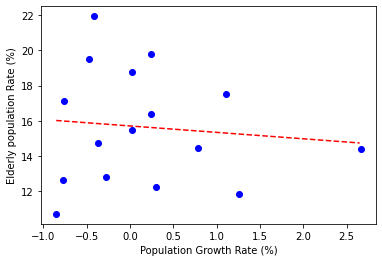

In [ ]:
import matplotlib.pyplot as plt

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

plt.plot(line_x, line_y, 'r--')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly population Rate (%)')
plt.show()

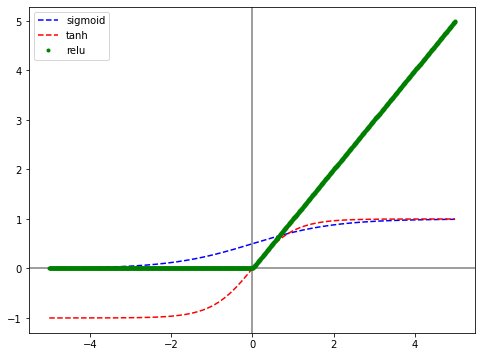

In [ ]:
# 활성화 함수
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]
relu = [0 if z < 0 else z for z in x]

plt.figure(figsize=(8, 6))

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b--', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.plot(x, relu, 'g.', label='relu')
plt.legend()
plt.show()

In [ ]:
# 4.11 데이터 불러오기

from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

print(train_X.shape, test_X.shape)
print(train_X[0])
print(train_Y[0])

57344/57026 [==============================] - 0s 0us/step
(404, 13) (102, 13)
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


In [ ]:
# 4.13 Boston Housing Dataset 회귀 모델 생성

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 52)                728       
_________________________________________________________________
dense_1 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_2 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 4.14 회귀 모델 학습
history = model.fit(train_X, train_Y, epochs= 25, 
                    batch_size=32,
                    validation_split=0.25)

Epoch 1/25
10/10 [==============================] - 0s 10ms/step - loss: 19.3891 - val_loss: 22.5349
Epoch 2/25
10/10 [==============================] - 0s 5ms/step - loss: 18.3632 - val_loss: 22.1035
Epoch 3/25
10/10 [==============================] - 0s 5ms/step - loss: 16.3861 - val_loss: 29.4310
Epoch 4/25
10/10 [==============================] - 0s 5ms/step - loss: 23.1993 - val_loss: 29.4398
Epoch 5/25
10/10 [==============================] - 0s 5ms/step - loss: 21.3879 - val_loss: 21.4401
Epoch 6/25
10/10 [==============================] - 0s 5ms/step - loss: 16.5091 - val_loss: 21.2813
Epoch 7/25
10/10 [==============================] - 0s 5ms/step - loss: 20.4164 - val_loss: 36.6389
Epoch 8/25
10/10 [==============================] - 0s 5ms/step - loss: 27.1641 - val_loss: 21.1701
Epoch 9/25
10/10 [==============================] - 0s 5ms/step - loss: 18.3216 - val_loss: 21.5823
Epoch 10/25
10/10 [==============================] - 0s 5ms/step - loss: 16.5587 - val_loss: 26.267

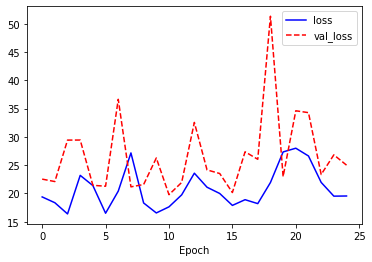

In [ ]:
# 4.15 회귀 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# 4.16 회귀 모델 평가
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 2ms/step - loss: 33.0656


33.06561279296875

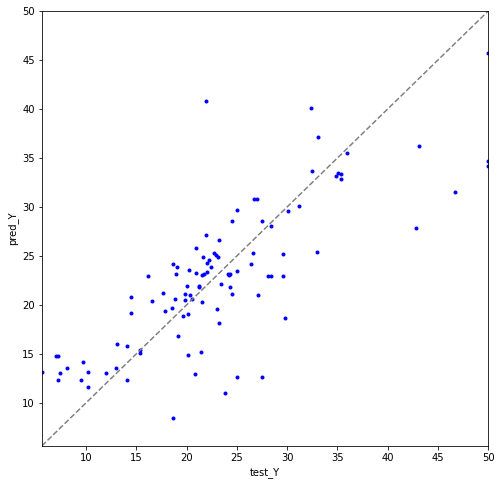

In [ ]:
# 4.17 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(8, 8))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# y=x에 해당하는 대각선
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".5")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

In [ ]:
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Epoch 1/25
10/10 [==============================] - 0s 6ms/step - loss: 27.6826 - val_loss: 41.6519
Epoch 2/25
10/10 [==============================] - 0s 3ms/step - loss: 28.8423 - val_loss: 28.3832
Epoch 3/25
10/10 [==============================] - 0s 3ms/step - loss: 24.7741 - val_loss: 31.3309
Epoch 4/25
10/10 [==============================] - 0s 3ms/step - loss: 23.5050 - val_loss: 27.2562
Epoch 5/25
10/10 [==============================] - 0s 3ms/step - loss: 17.0472 - val_loss: 38.1806
Epoch 6/25
10/10 [==============================] - 0s 3ms/step - loss: 20.3113 - val_loss: 29.4945
Epoch 7/25
10/10 [==============================] - 0s 3ms/step - loss: 18.6465 - val_loss: 20.6261
Epoch 8/25
10/10 [==============================] - 0s 3ms/step - loss: 16.8928 - val_loss: 21.1778
Epoch 9/25
10/10 [==============================] - 0s 3ms/step - loss: 17.9416 - val_loss: 21.5333
Epoch 10/25
10/10 [==============================] - 0s 3ms/step - loss: 16.5216 - val_loss: 33.1589